In [1]:
from Bio import Phylo
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
seqfile = open('../../sequences/dengue_all.fasta', 'r')
serotypes = ['DENV1', 'DENV2', 'DENV3', 'DENV4']

In [3]:
dates = {s.id.split('|')[0] : s.id.split('|')[2] for s in SeqIO.parse(seqfile, 'fasta')}

In [4]:
def fix_strain(name):
    if name.count('_') == 3:
        return name.replace('_', '/')
    else:
        sero, countrystrainyear = name.split('_', 1)
        countrystrain, year = countrystrainyear.rsplit('_', 1)
        country, strain = countrystrain.rsplit('_', 1)
        return '/'.join([sero, country, strain, year])
    
def fix_date(date):
    year, month, day = date.split('-')
    try:
        year = float(year)
    except:
        year = 0.
    try:
        month = float(year)
    except:
        month = 0.
    try:
        day = float(day)
    except:
        day = 0.
    return year + month/12. + day/30.

In [5]:
def plot_date_div(subtree):
    div_dict = subtree.depths()
    div_list = []
    date_list = []
    for clade, div in div_dict.iteritems():
        if clade.is_terminal():
            try:
                name = fix_strain(clade.name)
            except:
                name = clade.name
            date = fix_date(dates[name])
            div_list.append(div)
            date_list.append(date)
    plt.plot(date_list, div_list, 'o', alpha=0.2)
    plt.show()
    plt.clf()

In [6]:
T = Phylo.read('../../../titer_model/implementation-nextstrain-augur/dengue/processed/seasia_timetree.new', 'newick')

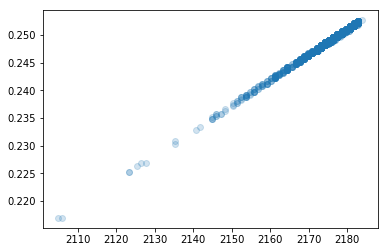

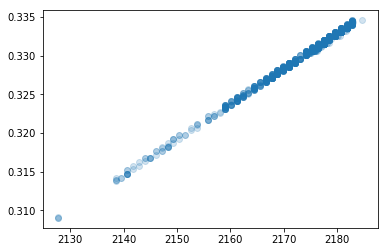

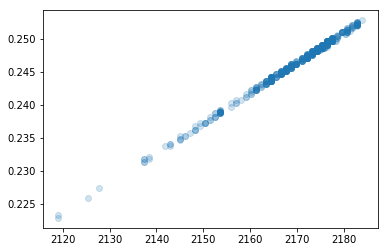

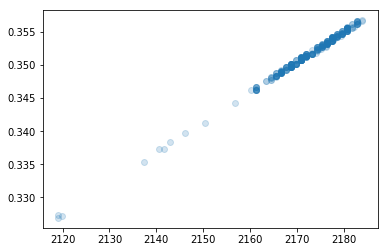

In [7]:
for s in serotypes:
    serotype_tips = [k for k in T.get_terminals() if k.name.startswith(s)]
    serotype_subtree = T.common_ancestor(serotype_tips)
    plot_date_div(serotype_subtree)

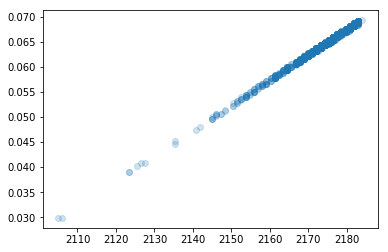

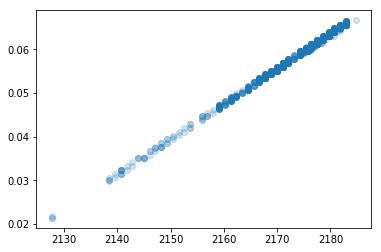

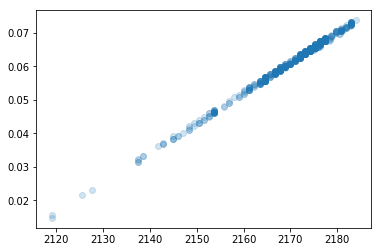

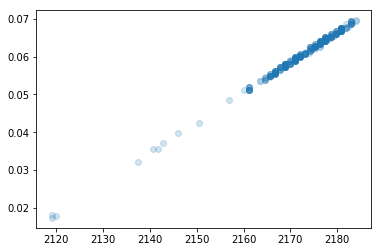

In [8]:
serotype_subtrees = {}
for s in serotypes:
    tree = Phylo.read('./seasia_%s_timetree.new'%s, 'newick')
#     for k in tree.get_terminals():
#         k.name = fix_strain(k.name)
    serotype_subtrees[s] = tree.format('newick').replace(';', '')

    plot_date_div(tree)


In [9]:
template = '(XXDENV4XX, (XXDENV2XX, (XXDENV1XX, XXDENV3XX)));'
for serotype, subtree in serotype_subtrees.items():
    template = template.replace('XX'+serotype+'XX', subtree)

open('seasia_topology.newick', 'w').write(template)

tree = Phylo.read('seasia_topology.newick', 'newick')

In [10]:
for t in tree.find_clades():
    if t.branch_length is None:
        t.branch_length = 1.

In [14]:
Phylo.write(tree, './seasia_topology.newick', 'newick')
Phylo.write(tree, '../../../titer_model/implementation-nextstrain-augur/dengue/processed/seasia.newick', 'newick')

1